# Import thư viện

In [ ]:
from google.colab import drive
import os
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/MY_data"

In [ ]:
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")

# hog + ảnh xám màu

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder

def load_data(data_dir, categories, target_size=(256, 256)):
    images = []
    labels = []

    label_encoder = LabelEncoder()
    label_encoder.fit(categories)

    for category in categories:
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Chuyển đổi kích thước ảnh
                img_resized = cv2.resize(img, target_size)
                # Chuyển đổi ảnh sang màu xám
                img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
                # Trích xuất đặc trưng HOG từ ảnh xám
                hog_features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
                images.append(hog_features)
                labels.append(category)

    print("Number of images:", len(images))
    print("Number of labels:", len(labels))

    # Chuyển đổi nhãn thành số nguyên
    encoded_labels = label_encoder.transform(labels)

    return np.array(images), encoded_labels


In [ ]:
categories = ["Apple", "Banana", "Cherry", "Kiwi", "Orange", "Pineapple", "Strawberries"]
X_train, y_train = load_data(train_dir, categories, target_size=(256, 256))
X_test, y_test = load_data(test_dir, categories, target_size=(256, 256))


Number of images: 1931
Number of labels: 1931
Number of images: 710
Number of labels: 710


## Random Forest

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy',verbose=3)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
print(rf_best_model)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.401 total time=  19.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.329 total time=  12.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.350 total time=  10.5s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.332 total time=  11.5s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.308 total time=  11.7s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.432 total time=  22.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.355 total time=  23.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.386 t

In [ ]:
print("Parameters of best model: ", rf_best_model.get_params())

Parameters of best model:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_best_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))


Accuracy on test set: 0.7197
Classification report:
              precision    recall  f1-score   support

       Apple       0.76      0.81      0.78        89
      Banana       0.65      0.72      0.68       106
      Cherry       0.69      0.68      0.68       105
        Kiwi       0.67      0.65      0.66       105
      Orange       0.74      0.49      0.59        97
   Pineapple       0.90      0.90      0.90       105
Strawberries       0.66      0.80      0.72       103

    accuracy                           0.72       710
   macro avg       0.72      0.72      0.72       710
weighted avg       0.72      0.72      0.72       710



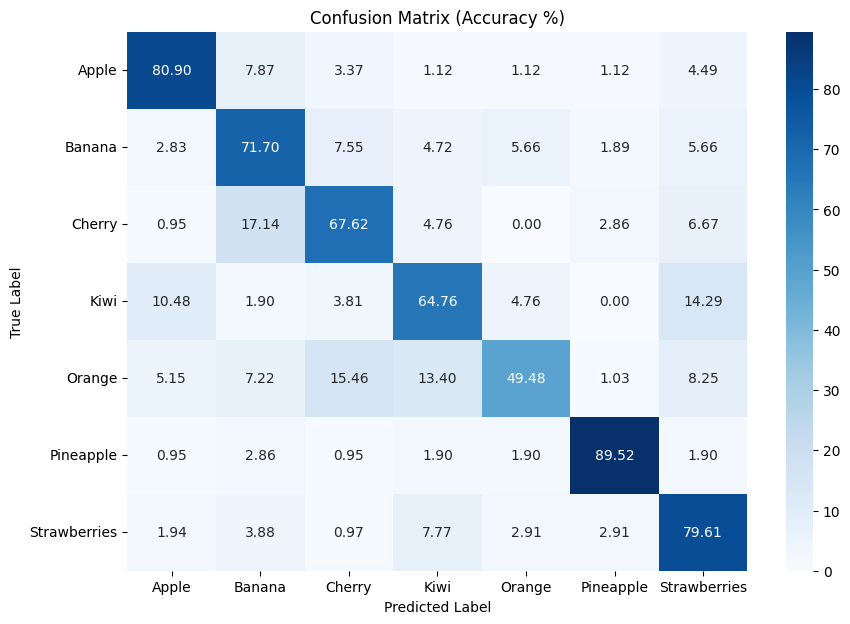

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tính tỷ lệ phần trăm cho từng ô trong confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Vẽ confusion matrix với độ chính xác
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy %)')
plt.show()

In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(rf_best_model, '/content/drive/MyDrive/rf_model.pkl')



print('Mô hình đã được lưu thành công trên Google Drive!')

Mô hình đã được lưu thành công trên Google Drive!


## KNN

In [ ]:
# Tạo danh sách các số từ 1 đến 50 cho n_neighbors
n_neighbors_range = list(range(1, 51))

# Chỉnh sửa từ điển knn_param_grid
knn_param_grid = {
    'n_neighbors': n_neighbors_range,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}




In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy',verbose=3)
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_
print(knn_best_model)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.370 total time=   2.4s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.246 total time=   2.6s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.313 total time=   2.7s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.282 total time=   2.2s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.238 total time=   1.7s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.370 total time=   1.7s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.246 total time=   1.7s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.313 total time=   1.7s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.282 total time=   1.7s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.238 

In [ ]:
y_pred = knn_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7042
Classification report:
              precision    recall  f1-score   support

       Apple       0.70      0.87      0.77        89
      Banana       0.83      0.69      0.75       106
      Cherry       0.87      0.52      0.65       105
        Kiwi       0.66      0.62      0.64       105
      Orange       0.70      0.56      0.62        97
   Pineapple       0.86      0.90      0.88       105
Strawberries       0.50      0.79      0.61       103

    accuracy                           0.70       710
   macro avg       0.73      0.71      0.70       710
weighted avg       0.73      0.70      0.70       710



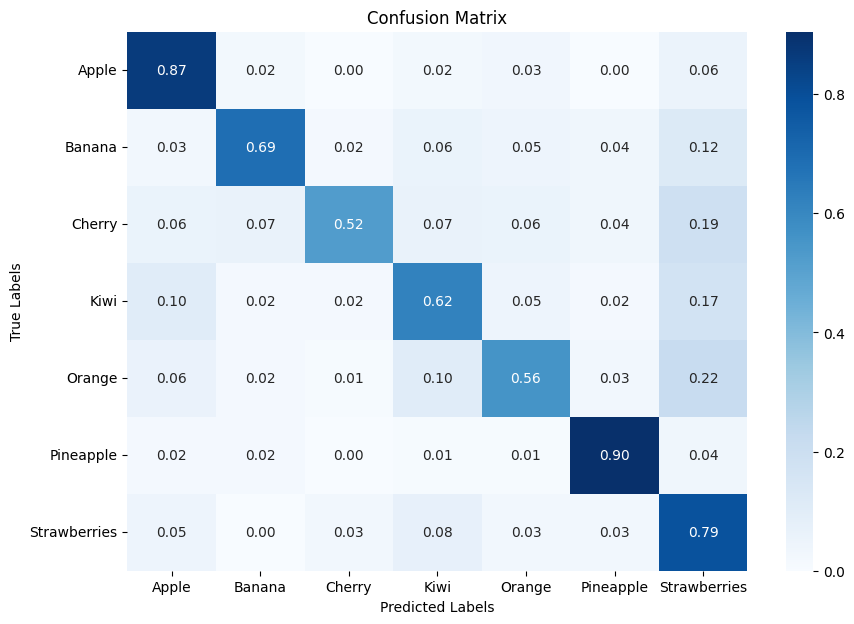

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(knn_best_model, '/content/drive/MyDrive/knn_model.pkl')



print('Mô hình đã được lưu thành công trên Google Drive!')

Mô hình đã được lưu thành công trên Google Drive!


## SVM

In [ ]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [ ]:
svm = SVC(probability=True)

In [ ]:
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=2, scoring='accuracy',verbose=3)
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_
print(svm_best_model)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.380 total time= 4.2min
[CV 2/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.375 total time= 4.0min
[CV 1/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.144 total time= 5.3min
[CV 2/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.216 total time= 5.1min
[CV 1/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.380 total time= 3.9min
[CV 2/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.375 total time= 3.9min
[CV 1/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.144 total time= 5.0min
[CV 2/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.188 total time= 5.1min
[CV 1/2] END ...C=1, gamma=scale, kernel=linear;, score=0.380 total time= 4.0min
[CV 2/2] END ...C=1, gamma=scale, kernel=linear;, score=0.375 total time= 3.8min
[CV 1/2] END ......C=1, gamma=scale, kernel=rbf;, score=0.384 total time= 5.2min
[CV 2/2] END ......C=1, gamma=scale, kernel=rbf;

In [ ]:
print("Parameters of best model: ", svm_best_model.get_params())

Parameters of best model:  {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
y_pred = svm_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7310
Classification report:
              precision    recall  f1-score   support

       Apple       0.79      0.81      0.80        89
      Banana       0.70      0.70      0.70       106
      Cherry       0.59      0.66      0.62       105
        Kiwi       0.72      0.75      0.73       105
      Orange       0.67      0.57      0.61        97
   Pineapple       0.93      0.89      0.91       105
Strawberries       0.73      0.75      0.74       103

    accuracy                           0.73       710
   macro avg       0.73      0.73      0.73       710
weighted avg       0.73      0.73      0.73       710



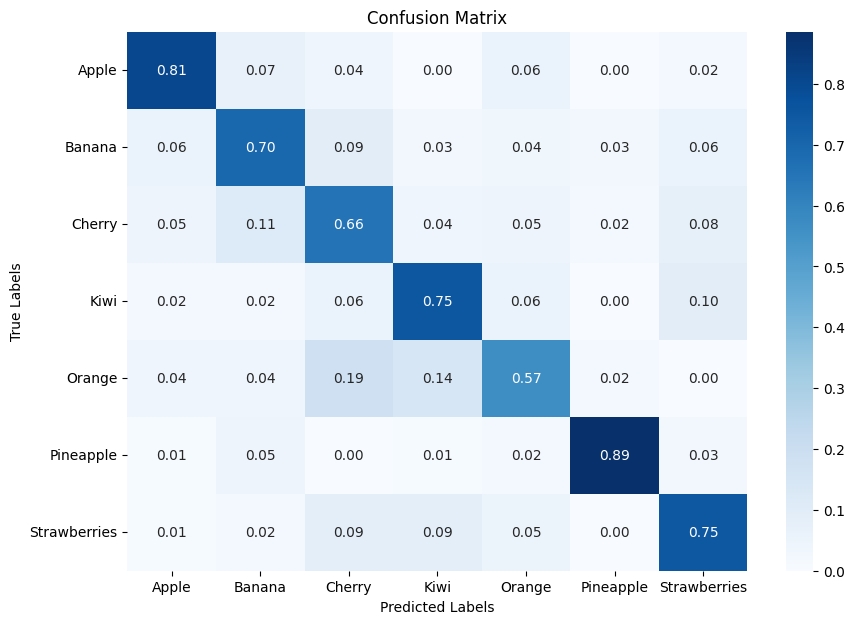

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(svm_best_model, '/content/drive/MyDrive/svm_model.pkl')


['/content/drive/MyDrive/svm_model.pkl']

# Ko hog + có ảnh xám màu

In [ ]:
def load_data(data_dir, categories, target_size=(256, 256)):
    images = []
    labels = []

    label_encoder = LabelEncoder()
    label_encoder.fit(categories)

    for category in categories:
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Thay đổi kích thước ảnh
                img_resized = cv2.resize(img, target_size)
                images.append(img_resized)
                labels.append(category)

    print("Number of images:", len(images))
    print("Number of labels:", len(labels))

    # Chuyển đổi nhãn thành số nguyên
    encoded_labels = label_encoder.transform(labels)

    return np.array(images), encoded_labels


In [ ]:
categories = ["Apple", "Banana", "Cherry", "Kiwi", "Orange", "Pineapple", "Strawberries"]

In [ ]:
X_train, y_train = load_data(train_dir, categories, (256,256))
X_test, y_test = load_data(test_dir, categories, (256,256))

Number of images: 1931
Number of labels: 1931
Number of images: 710
Number of labels: 710


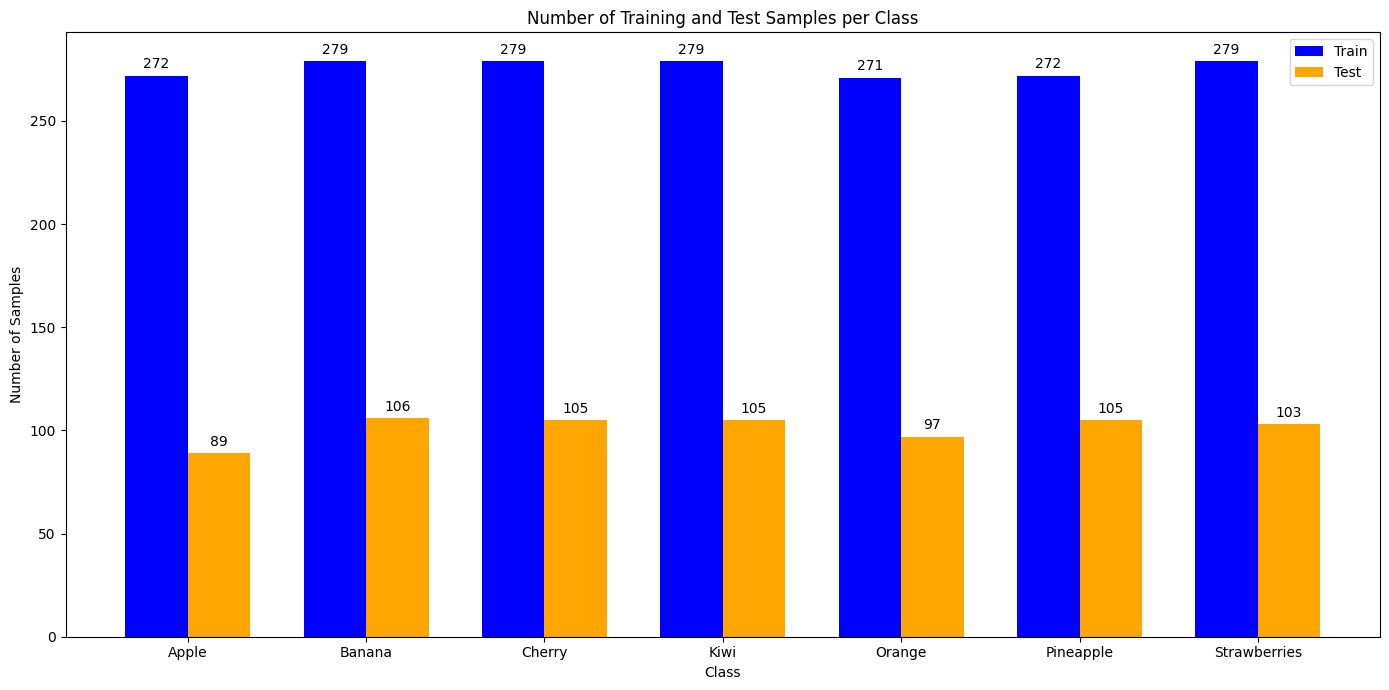

In [ ]:
# Count samples for each class in train and test sets
train_counts = np.bincount(y_train, minlength=len(categories))
test_counts = np.bincount(y_test, minlength=len(categories))

# Combined bar width and positions
bar_width = 0.35
indices = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(14, 7))

# Plot train samples
bars1 = ax.bar(indices, train_counts, bar_width, label='Train', color='blue')

# Plot test samples next to train samples
bars2 = ax.bar(indices + bar_width, test_counts, bar_width, label='Test', color='orange')

# Adding text annotations
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Training and Test Samples per Class')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Làm phẳng dữ liệu hình ảnh
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## SVM

In [ ]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [ ]:
svm = SVC(probability=True)

In [ ]:
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=2, scoring='accuracy',verbose=3)
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_
print(svm_best_model)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.286 total time= 9.2min
[CV 2/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.282 total time= 8.8min
[CV 1/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.266 total time=11.6min
[CV 2/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.254 total time=11.6min
[CV 1/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.286 total time= 8.7min
[CV 2/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.282 total time= 8.3min
[CV 1/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.144 total time=11.5min
[CV 2/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.155 total time=11.7min
[CV 1/2] END ...C=1, gamma=scale, kernel=linear;, score=0.286 total time= 8.5min
[CV 2/2] END ...C=1, gamma=scale, kernel=linear;, score=0.282 total time= 8.3min
[CV 1/2] END ......C=1, gamma=scale, kernel=rbf;, score=0.384 total time=10.4min
[CV 2/2] END ......C=1, gamma=scale, kernel=rbf;

In [ ]:
print("Parameters of best model: ", svm_best_model.get_params())

Parameters of best model:  {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
y_pred = svm_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.5930
Classification report:
              precision    recall  f1-score   support

       Apple       0.62      0.54      0.58        89
      Banana       0.49      0.54      0.51       106
      Cherry       0.65      0.63      0.64       105
        Kiwi       0.62      0.60      0.61       105
      Orange       0.50      0.64      0.56        97
   Pineapple       0.78      0.65      0.71       105
Strawberries       0.55      0.55      0.55       103

    accuracy                           0.59       710
   macro avg       0.60      0.59      0.59       710
weighted avg       0.60      0.59      0.60       710



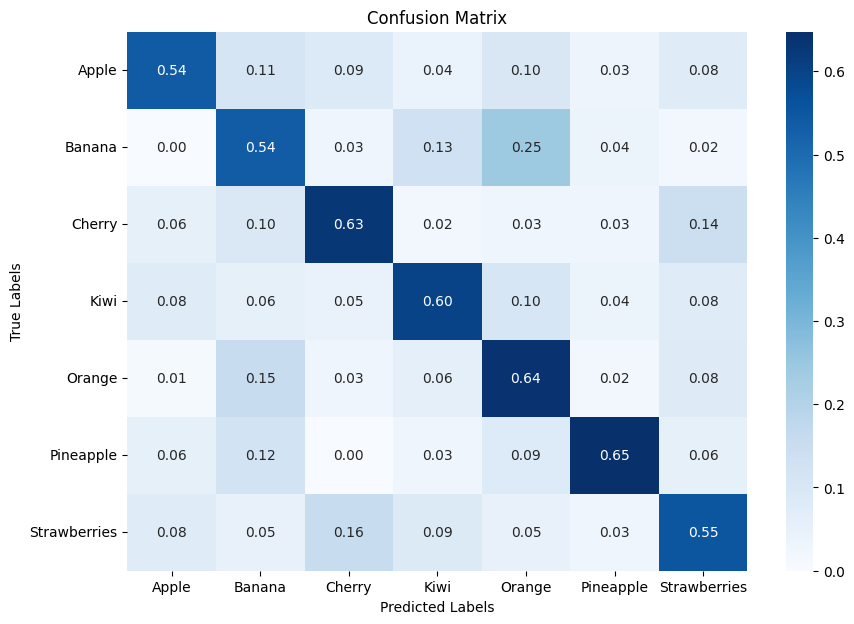

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(svm_best_model, '/content/drive/MyDrive/svm_model_NO_HOG.pkl')



## KNN

In [ ]:
# Tạo danh sách các số từ 1 đến 50 cho n_neighbors
n_neighbors_range = list(range(1, 51))

# Chỉnh sửa từ điển knn_param_grid
knn_param_grid = {
    'n_neighbors': n_neighbors_range,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}




In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy',verbose=3)
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_
print(knn_best_model)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.357 total time=   5.6s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.285 total time=   3.3s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.308 total time=   3.1s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.285 total time=   3.1s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.311 total time=   5.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.357 total time=   4.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.285 total time=   3.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.308 total time=   3.1s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.285 total time=   3.4s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.311 

In [ ]:
print("Parameters of best model: ", knn_best_model.get_params())

Parameters of best model:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}


In [ ]:
y_pred = knn_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7099
Classification report:
              precision    recall  f1-score   support

       Apple       0.79      0.84      0.82        89
      Banana       0.72      0.61      0.66       106
      Cherry       0.88      0.58      0.70       105
        Kiwi       0.77      0.60      0.67       105
      Orange       0.47      0.84      0.60        97
   Pineapple       0.81      0.89      0.85       105
Strawberries       0.77      0.64      0.70       103

    accuracy                           0.71       710
   macro avg       0.74      0.71      0.71       710
weighted avg       0.75      0.71      0.71       710



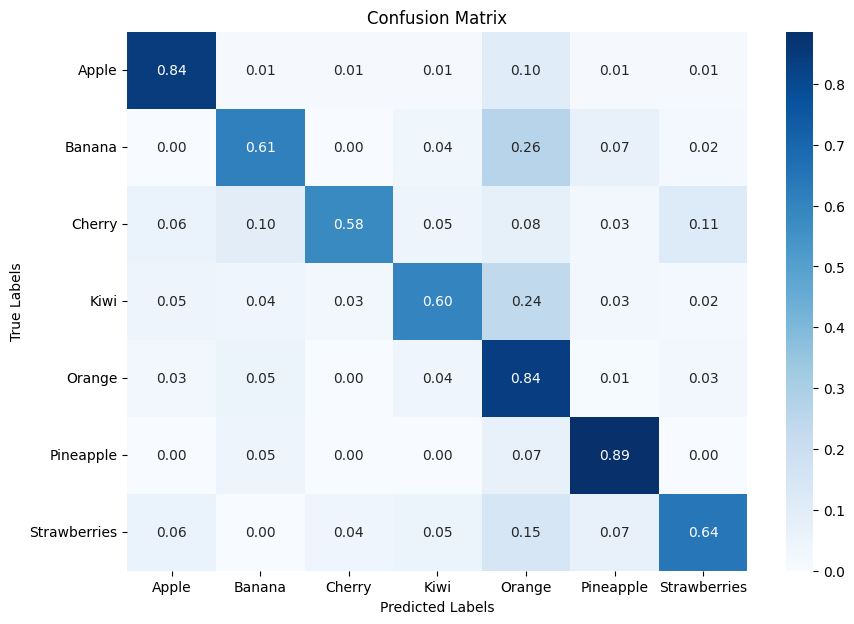

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(knn_best_model, '/content/drive/MyDrive/knn_model_NO_HOG.pkl')



print('Mô hình đã được lưu thành công trên Google Drive!')

Mô hình đã được lưu thành công trên Google Drive!


## Random Forest

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy',verbose=3)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
print(rf_best_model)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.517 total time=  13.5s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.396 total time=  13.6s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.422 total time=  13.7s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.383 total time=  24.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.373 total time=  13.4s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.509 total time=  27.4s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.422 total time=  27.2s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.435 t

In [ ]:
print("Parameters of best model: ", rf_best_model.get_params())

Parameters of best model:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_best_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7479
Classification report:
              precision    recall  f1-score   support

       Apple       0.84      0.83      0.84        89
      Banana       0.76      0.64      0.69       106
      Cherry       0.72      0.70      0.71       105
        Kiwi       0.73      0.76      0.74       105
      Orange       0.70      0.71      0.70        97
   Pineapple       0.79      0.90      0.84       105
Strawberries       0.72      0.69      0.70       103

    accuracy                           0.75       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.75      0.75      0.75       710



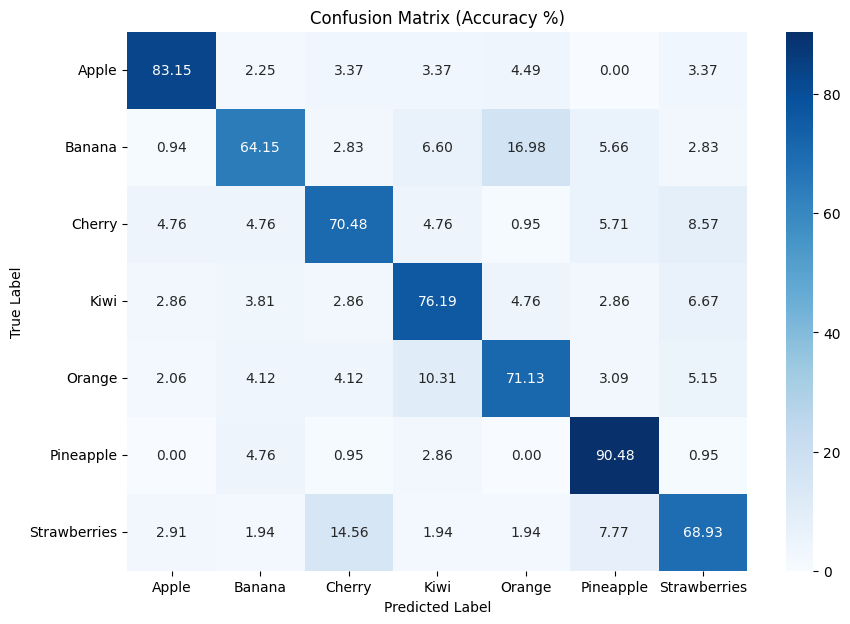

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tính tỷ lệ phần trăm cho từng ô trong confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Vẽ confusion matrix với độ chính xác
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy %)')
plt.show()

In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(rf_best_model, '/content/drive/MyDrive/rf_model_NO_HOG.pkl')



print('Mô hình đã được lưu thành công trên Google Drive!')


Mô hình đã được lưu thành công trên Google Drive!


# Voting model + Hog

In [ ]:
# Khởi tạo mô hình SVM với các tham số tốt nhất
svm_best_model = SVC(C=10, kernel='rbf', gamma='scale')
# Khởi tạo mô hình KNN với các tham số tốt nhất
knn_best_model = KNeighborsClassifier(metric='manhattan', weights='distance',n_neighbors=5)
# Khởi tạo mô hình KNN với các tham số tốt nhất
rf_best_model = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,min_samples_leaf=1,
                       random_state=42)

In [ ]:
# Giả sử bạn đã có các mô hình tốt nhất: rf_best_model, svm_best_model, knn_best_model
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_best_model),
        ('svm', svm_best_model),
        ('knn', knn_best_model)
    ],
    voting='hard'
)

In [ ]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svm', SVC(C=10)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   weights='distance'))])

In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(voting_model, '/content/drive/MyDrive/voting_model.pkl')



print('Mô hình đã được lưu thành công trên Google Drive!')


Mô hình đã được lưu thành công trên Google Drive!


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = voting_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7366
Classification report:
              precision    recall  f1-score   support

       Apple       0.67      0.83      0.74        89
      Banana       0.69      0.77      0.73       106
      Cherry       0.69      0.68      0.68       105
        Kiwi       0.72      0.67      0.69       105
      Orange       0.81      0.53      0.64        97
   Pineapple       0.97      0.89      0.93       105
Strawberries       0.68      0.80      0.73       103

    accuracy                           0.74       710
   macro avg       0.75      0.74      0.73       710
weighted avg       0.75      0.74      0.74       710



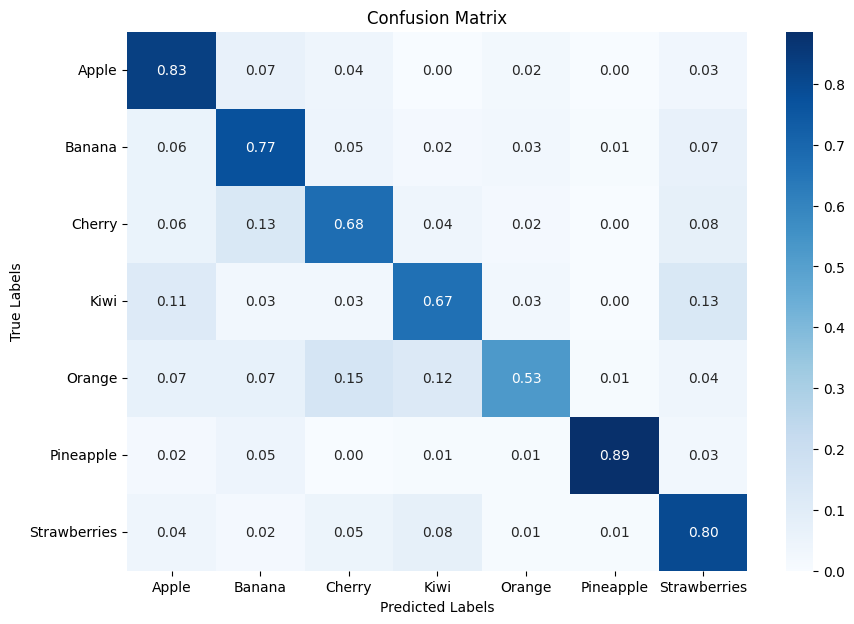

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Voting model+Ko hog + có ảnh xám màu


In [ ]:
# Khởi tạo mô hình SVM với các tham số tốt nhất
svm_best_model = SVC(C=1, kernel='rbf', gamma='scale')
# Khởi tạo mô hình KNN với các tham số tốt nhất
knn_best_model = KNeighborsClassifier(metric='manhattan', weights='distance',n_neighbors=13)
# Khởi tạo mô hình KNN với các tham số tốt nhất
rf_best_model = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=200,min_samples_leaf=2,
                       random_state=42)

In [ ]:
# Giả sử bạn đã có các mô hình tốt nhất: rf_best_model, svm_best_model, knn_best_model
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_best_model),
        ('svm', svm_best_model),
        ('knn', knn_best_model)
    ],
    voting='hard' # Trọng số tương ứng cho các mô hình: rf, svm, knn
)

In [ ]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svm', SVC(C=1)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=13,
                                                   weights='distance'))])

In [ ]:
!pip install joblib

import joblib
from google.colab import drive

# Giả sử bạn đã huấn luyện mô hình SVM của mình
# svm_model = ...
joblib.dump(voting_model, '/content/drive/MyDrive/voting_model_NO_HOG.pkl')



print('Mô hình đã được lưu thành công trên Google Drive!')

Mô hình đã được lưu thành công trên Google Drive!


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = voting_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7366
Classification report:
              precision    recall  f1-score   support

       Apple       0.77      0.84      0.81        89
      Banana       0.65      0.67      0.66       106
      Cherry       0.74      0.67      0.70       105
        Kiwi       0.74      0.71      0.73       105
      Orange       0.63      0.73      0.68        97
   Pineapple       0.87      0.90      0.88       105
Strawberries       0.77      0.65      0.71       103

    accuracy                           0.74       710
   macro avg       0.74      0.74      0.74       710
weighted avg       0.74      0.74      0.74       710



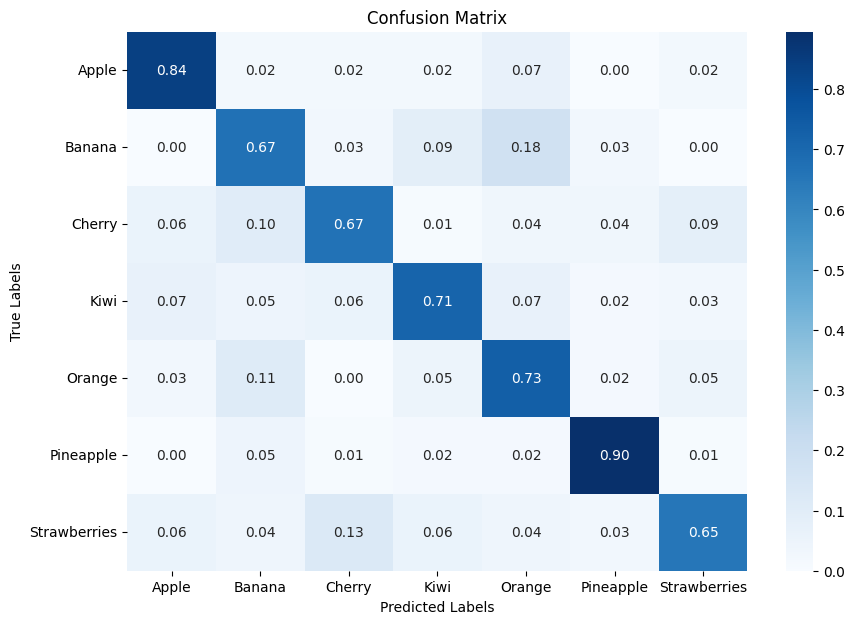

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()